# **Classification**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving diabetes .csv to diabetes .csv


In [ ]:
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['diabetes .csv']))

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

 Our data has 768 rows and 9 variables. The dependent variable is  the "Outcome" columns.

In [ ]:
# Check for missing values

data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

We have no missing data.

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

All the columns have appropriate data types.

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The following variables have values of 0, which we deem inappropriate based on the normal range for each: Glucose, BloodPressure, SkinThickness, Insulin, BMI.
The variables are skewed therefore we will use the median for the missing values.

In [ ]:
columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

import statistics

for col in columns:
  data[col].replace(to_replace=0, value=statistics.median(data[col]), inplace=True)

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The data is clean therefore we can move to visualisation.

In [ ]:
import matplotlib.pyplot as plt

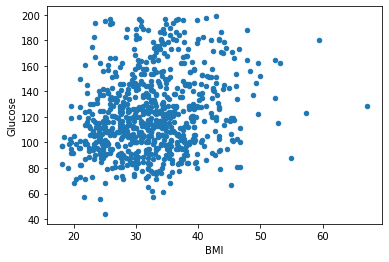

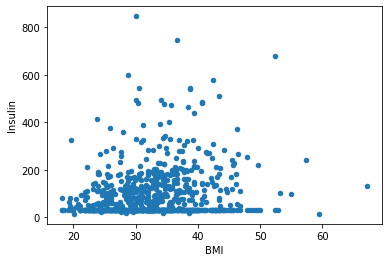

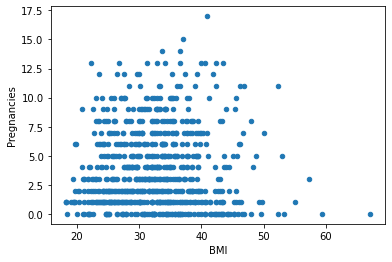

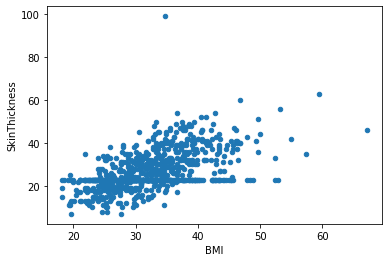

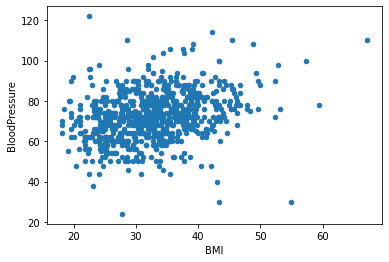

In [ ]:
data.plot(kind='scatter', x='BMI', y='Glucose')
data.plot(kind='scatter', x='BMI', y='Insulin')
data.plot(kind='scatter', x='BMI', y='Pregnancies')
data.plot(kind='scatter', x='BMI', y='SkinThickness')
data.plot(kind='scatter', x='BMI', y='BloodPressure')

There is a slight positive correlation between BMI and Glucose, and a clear positive correlation between BMI & SkinThickness and BMI & BloodPressure.

There appears to be no relationship between BMI & Pregnancies and BMI & Insulin.

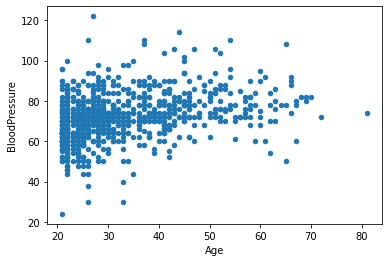

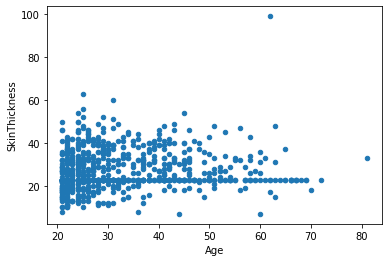

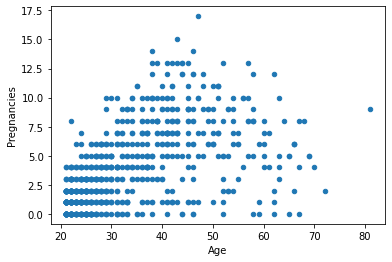

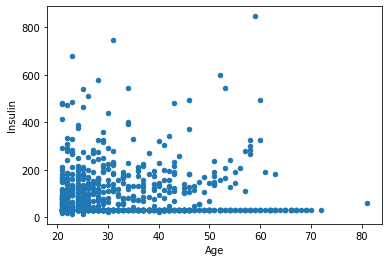

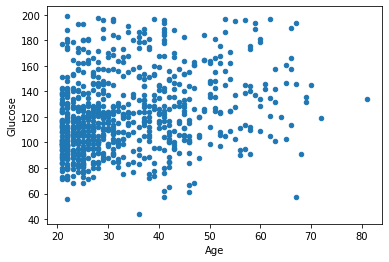

In [ ]:
data.plot(kind='scatter', x='Age', y='BloodPressure')
data.plot(kind='scatter', x='Age', y='SkinThickness')
data.plot(kind='scatter', x='Age', y='Pregnancies')
data.plot(kind='scatter', x='Age', y='Insulin')
data.plot(kind='scatter', x='Age', y='Glucose')

There is no evident relationship between Age and the other variables.

In [ ]:
data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].corr(method="pearson")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000


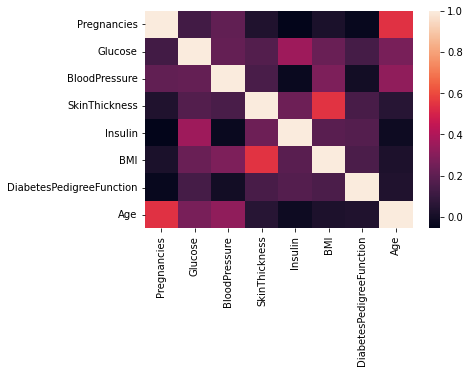

In [ ]:
import seaborn as sns

sns.heatmap(data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].corr(method="pearson"))

Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

features = data.drop("Outcome", axis=1)

features_scale = scale.fit_transform(features)

features_scale = pd.DataFrame(features_scale, columns=features.columns, index=features.index)
features_scale.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496


In [ ]:
data_scale = features_scale
data_scale["Outcome"] = data["Outcome"]
data_scale.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496,1


Split the data into train and test sets in the ratio 70% and 30%.

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_scale, test_size=0.2, random_state=0)

In [ ]:
x_train = train_set.drop("Outcome", axis=1)
y_train = train_set["Outcome"]
x_test = test_set.drop("Outcome", axis=1)
y_test = test_set["Outcome"]

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200, random_state=0)

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



In [ ]:
data_scale.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Our label is imbalanced between negative and positive diabetes cases. We need to up-sample the positive cases.


In [ ]:
from imblearn.over_sampling import SMOTE

label = data_scale["Outcome"]

smote = SMOTE(random_state=0)
x_smote, y_smote = smote.fit_resample(features_scale, label)
data_smote = pd.DataFrame(x_smote)
data_smote["Outcome"] = y_smote

data_smote.Outcome.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_smote, test_size=0.2, random_state=0)

In [ ]:
x_train = train_set.drop("Outcome", axis=1)
y_train = train_set["Outcome"]
x_test = test_set.drop("Outcome", axis=1)
y_test = test_set["Outcome"]

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200, random_state=0)

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.80      0.78      0.79        95

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



After rebalancing our results for the positive diagnosis are much better.

**Neural Network model**

In [ ]:
import numpy as np
import tensorflow as tf
import random as python_random

def reset_seed():
  tf.random.set_seed(0)
  np.random.seed(0)
  python_random.seed(0)

In [ ]:
from tensorflow import keras

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=10, activation="relu"))
model.add(tf.keras.layers.Dense(units=10, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

reset_seed()
model.fit(x_train, y_train, batch_size=10, epochs = 100)

y_pred = (model.predict(x_test) > 0.5).astype(int)
print(classification_report(y_test,y_pred))

Epoch 1/100
80/80 [==============================] - 2s 4ms/step - loss: 0.6722 - accuracy: 0.5612
Epoch 2/100
80/80 [==============================] - 0s 3ms/step - loss: 0.6131 - accuracy: 0.6538
Epoch 3/100
80/80 [==============================] - 0s 4ms/step - loss: 0.5705 - accuracy: 0.6938
Epoch 4/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5391 - accuracy: 0.7125
Epoch 5/100
80/80 [==============================] - 0s 4ms/step - loss: 0.5182 - accuracy: 0.7200
Epoch 6/100
80/80 [==============================] - 0s 4ms/step - loss: 0.5026 - accuracy: 0.7312
Epoch 7/100
80/80 [==============================] - 0s 4ms/step - loss: 0.4910 - accuracy: 0.7387
Epoch 8/100
80/80 [==============================] - 0s 4ms/step - loss: 0.4838 - accuracy: 0.7387
Epoch 9/100
80/80 [==============================] - 0s 6ms/step - loss: 0.4776 - accuracy: 0.7475
Epoch 10/100
80/80 [==============================] - 0s 4ms/step - loss: 0.4735 - accuracy: 0.7538
Epoch 11/

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=5, activation="relu"))
model.add(tf.keras.layers.Dense(units=5, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

reset_seed()
model.fit(x_train, y_train, batch_size=15, epochs = 100)

y_pred = (model.predict(x_test) > 0.5).astype(int)
print(classification_report(y_test,y_pred))

Epoch 1/100
54/54 [==============================] - 1s 2ms/step - loss: 0.7109 - accuracy: 0.6162
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.6888
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.7188
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.7375
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.7450
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5378 - accuracy: 0.7525
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.7538
Epoch 8/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.7525
Epoch 9/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7525
Epoch 10/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7563
Epoch 11/

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=10, activation="relu"))
model.add(tf.keras.layers.Dense(units=10, activation="relu"))
model.add(tf.keras.layers.Dense(units=10, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

reset_seed()
model.fit(x_train, y_train, batch_size=15, epochs = 100)

y_pred = (model.predict(x_test) > 0.5).astype(int)
print(classification_report(y_test,y_pred))

Epoch 1/100
54/54 [==============================] - 1s 2ms/step - loss: 0.6695 - accuracy: 0.6137
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.6438
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.6812
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7038
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.7100
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7212
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7287
Epoch 8/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7387
Epoch 9/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7425
Epoch 10/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7425
Epoch 11/

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=10, activation="relu"))
model.add(tf.keras.layers.Dense(units=10, activation="relu"))
model.add(tf.keras.layers.Dense(units=10, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

reset_seed()
model.fit(x_train, y_train, batch_size=15, epochs = 150)

y_pred = (model.predict(x_test) > 0.5).astype(int)
print(classification_report(y_test,y_pred))

Epoch 1/150
54/54 [==============================] - 1s 2ms/step - loss: 0.6695 - accuracy: 0.6137
Epoch 2/150
54/54 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.6438
Epoch 3/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.6812
Epoch 4/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7038
Epoch 5/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.7100
Epoch 6/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7212
Epoch 7/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7287
Epoch 8/150
54/54 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7387
Epoch 9/150
54/54 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7425
Epoch 10/150
54/54 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7425
Epoch 11/

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=5, activation="relu"))
model.add(tf.keras.layers.Dense(units=5, activation="relu"))
model.add(tf.keras.layers.Dense(units=5, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

reset_seed()
model.fit(x_train, y_train, batch_size=10, epochs = 100)

y_pred = (model.predict(x_test) > 0.5).astype(int)
print(classification_report(y_test,y_pred))

Epoch 1/100
80/80 [==============================] - 1s 2ms/step - loss: 0.6626 - accuracy: 0.6137
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.6925
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.6975
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.7212
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.7337
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7362
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.7425
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7538
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.7625
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7675
Epoch 11/

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=500, random_state=0)
mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.82      0.82      0.82        95

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


We can decrease the layer sizes to see if it reduces overfitting.

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500, random_state=0)
mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       105
           1       0.84      0.92      0.88        95

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Our results are better. Let's see if we can reduce it further.

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(5,4,2), max_iter=500, random_state=0)
mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       105
           1       0.77      0.88      0.82        95

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Our results are worse. We can take the best model and change the number of iterations.

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(5,4,3), max_iter=600, random_state=0)
mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       105
           1       0.85      0.94      0.89        95

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
